In [ ]:
col_list = ["date","price"]
import pandas as pd
df = pd.read_csv("Lentis Chattagram.csv", usecols=col_list,parse_dates = ['date'])
df.head()

,date,price
0,2005-10-15,45.0
1,2005-11-15,43.0
2,2005-12-15,43.0
3,2006-01-15,43.0
4,2006-02-15,43.5


In [ ]:
df.describe()

,price
count,193.000000
mean,78.449254
std,16.097462
min,43.000000
25%,71.000000
50%,80.440000
75%,86.000000
max,159.250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    193 non-null    datetime64[ns]
 1   price   193 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2005-10-15,45.0
1,2005-11-15,43.0
2,2005-12-15,43.0
3,2006-01-15,43.0
4,2006-02-15,43.5


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from fbprophet import Prophet
m = Prophet(interval_width = 0.95, weekly_seasonality = False,yearly_seasonality = False)
m.fit(df)
#Check Interval Width between 0.75 to 0.95 and weekly Seasonality and Yearly Seasonality True\False

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


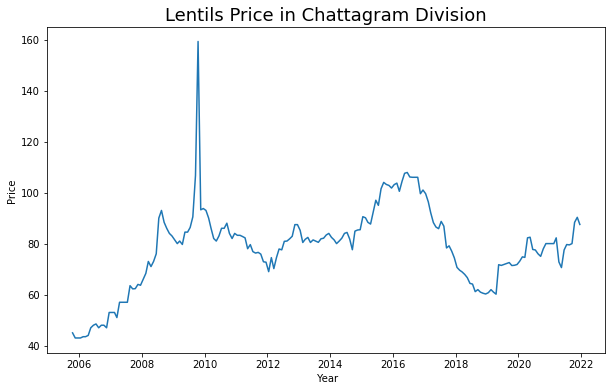

In [ ]:
plt.figure(facecolor='w',figsize=(10, 6))
plt.plot(df.ds,df.y)
plt.title('Lentils Price in Chattagram Division',size = 18)
plt.xlabel(' Year')
plt.ylabel('Price')
plt.show()

In [ ]:
future = m.make_future_dataframe(periods = 50,freq ='SMS')
forecast = m.predict(future)
forecast.tail(16)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
227,2023-06-01,68.865868,45.692489,89.963534,66.866944,70.732000,0.0,0.0,0.0,0.0,0.0,0.0,68.865868
228,2023-06-15,68.767040,47.059194,90.055777,66.723058,70.738132,0.0,0.0,0.0,0.0,0.0,0.0,68.767040
229,2023-07-01,68.654093,45.962207,89.835981,66.535691,70.742873,0.0,0.0,0.0,0.0,0.0,0.0,68.654093
230,2023-07-15,68.555265,47.100231,90.117870,66.371745,70.702198,0.0,0.0,0.0,0.0,0.0,0.0,68.555265
231,2023-08-01,68.435260,46.022991,89.082692,66.154304,70.684789,0.0,0.0,0.0,0.0,0.0,0.0,68.435260
232,2023-08-15,68.336431,45.832047,90.896098,65.987243,70.673791,0.0,0.0,0.0,0.0,0.0,0.0,68.336431
233,2023-09-01,68.216426,47.298252,90.421277,65.795201,70.611764,0.0,0.0,0.0,0.0,0.0,0.0,68.216426
234,2023-09-15,68.117597,45.932004,88.779998,65.623539,70.599805,0.0,0.0,0.0,0.0,0.0,0.0,68.117597
235,2023-10-01,68.004651,45.979758,89.807779,65.423127,70.569164,0.0,0.0,0.0,0.0,0.0,0.0,68.004651
236,2023-10-15,67.905823,46.061735,90.273900,65.233453,70.522786,0.0,0.0,0.0,0.0,0.0,0.0,67.905823


In [ ]:
df.shape

(193, 2)

In [ ]:
future.shape

(243, 1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Forcasting Price of Lentils in Chattagram Division')

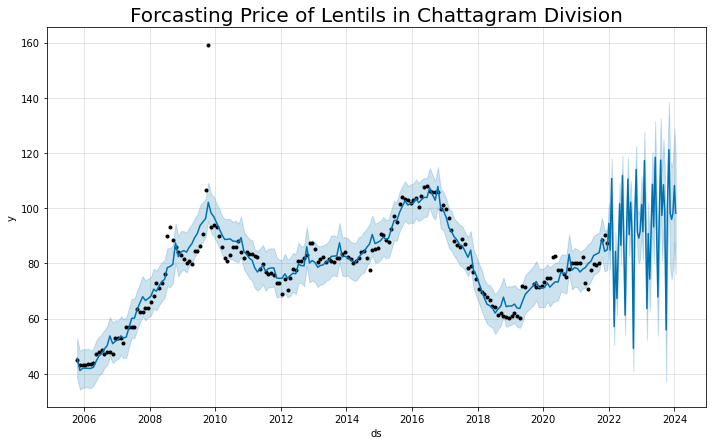

In [ ]:
m1 = Prophet(changepoint_prior_scale=0.5)
forecast1 = m1.fit(df).predict(future)
fig4 = m1.plot(forecast1)
a = fig4.gca()
a.set_title('Forcasting Price of Lentils in Chattagram Division',size=20)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv = cross_validation(m,initial = '100 days', period='50 days', horizon='300 days')

INFO:fbprophet:Making 111 forecasts with cutoffs between 2006-01-28 00:00:00 and 2021-02-18 00:00:00


  0%|          | 0/111 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:

In [ ]:
cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1077,2021-08-15,68.321038,47.451894,89.497406,79.50,2021-02-18
1078,2021-09-15,68.003419,46.360680,90.089223,80.00,2021-02-18
1079,2021-10-15,67.696046,45.556760,89.200060,88.33,2021-02-18
1080,2021-11-15,67.378427,46.445868,88.979695,90.30,2021-02-18
1081,2021-12-15,67.071054,46.442318,89.290046,87.50,2021-02-18


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(cv)
E = pd.DataFrame(df_pm)
E.to_csv('/content//drive//MyDrive/Dataset//Lentils Chattagram PM.csv')
#df_pm

In [1]:
col_list = ["date","price"]
import pandas as pd
df = pd.read_csv("Lentis Chattagram.csv", usecols=col_list,parse_dates = ['date'])
df.head()

,date,price
0,2005-10-15,45.0
1,2005-11-15,43.0
2,2005-12-15,43.0
3,2006-01-15,43.0
4,2006-02-15,43.5


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from darts import TimeSeries
from darts.models import (
    NaiveDrift,
    NaiveSeasonal,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT,
    RNNModel,
    NaiveEnsembleModel,
    NBEATSModel,
    TCNModel,
    AutoARIMA,
    TBATS
    
)

from darts.metrics import mae
from darts .utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

import warnings
warnings.filterwarnings('ignore')

import logging 
logging.disable(logging.CRITICAL)

In [3]:
series = TimeSeries.from_dataframe(df, 'date','price',fill_missing_dates=True, freq='SM')#
series.head()

<TimeSeries (DataArray) (date: 5, component: 1, sample: 1)>
array([[[45.]],

       [[nan]],

       [[43.]],

       [[nan]],

       [[43.]]])
Coordinates:
  * date       (date) datetime64[ns] 2005-10-15 2005-10-31 ... 2005-12-15
  * component  (component) object 'price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

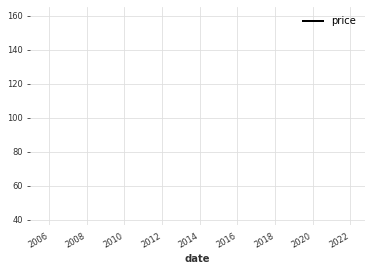

In [4]:
series.plot()

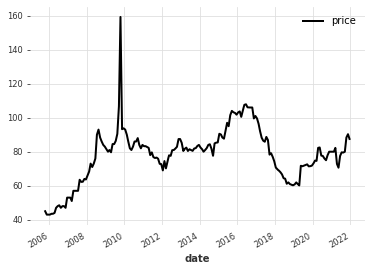

In [5]:
import darts
series = darts.utils.missing_values.fill_missing_values(series, fill='auto',)
series.plot()

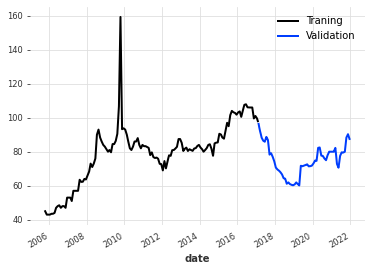

In [6]:
train, val = series.split_after(0.7)
train.plot(label = 'Traning')
val.plot(label = 'Validation')
plt.legend()

In [7]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
train_scaled = scaler.fit_transform([train])

#train_scaled.plot()


Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

TCNModel = MAE :  18.940133393463054


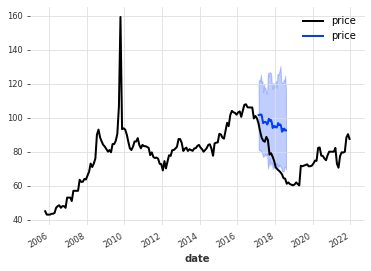

In [8]:
from darts.utils.likelihood_models import LaplaceLikelihood

model = TCNModel(
    input_chunk_length=24,
    output_chunk_length=12,
    random_state=42,
    likelihood=LaplaceLikelihood(),
)

model.fit(train_scaled, epochs=400, verbose=True);

pred = model.predict(n=36, num_samples=500)

# scale back:
pred = scaler.inverse_transform(pred)

series.plot()
pred.plot()

print("TCNModel = MAE : ",mae(series,pred))

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

NBEATSModel = MAE :  25.622461722690435


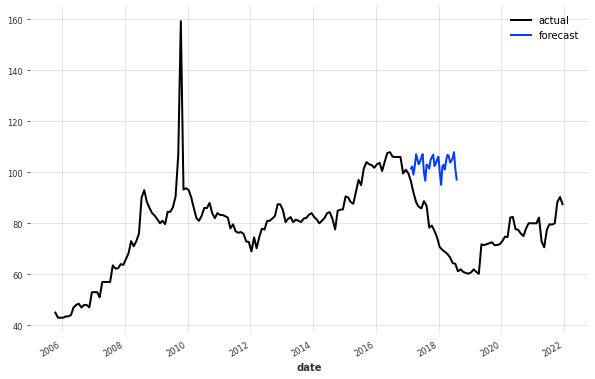

In [9]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit(train_scaled, epochs=50, verbose=True);

pred = model.predict(n=36)


# scale back:
pred = scaler.inverse_transform(pred)

plt.figure(figsize=(10, 6))
series.plot(label="actual")
pred.plot(label="forecast")


print("NBEATSModel = MAE : ",mae(series,pred))

In [10]:
def evaluate_model(m):
    m.fit(train)
    forecast = m.predict(len(val))
    print("Model {} obtains MAE :{:}".format(m,mae(val,forecast)))

#evaluate_model(ExponentialSmoothing())
evaluate_model(TBATS())
evaluate_model(AutoARIMA())
evaluate_model(Theta())
evaluate_model(NaiveDrift())
evaluate_model(NaiveSeasonal())
evaluate_model(Prophet())
evaluate_model(ARIMA())
#evaluate_model(RegressionEnsembleModel())
#evaluate_model(RegressionModel())
evaluate_model(FFT())

Model (T)BATS obtains MAE :23.28359909278866
Model Auto-ARIMA obtains MAE :22.95882548281198
Model Theta(2) obtains MAE :27.974908462062345
Model Naive drift model obtains MAE :34.57762973475889
Model Naive seasonal model, with K=1 obtains MAE :23.046504273504283
Model Prophet obtains MAE :52.666781159029604
Model ARIMA(12, 1, 0) obtains MAE :24.222534547691605
Model FFT(nr_freqs_to_keep=10, trend=None) obtains MAE :14.026059718496972


  0%|          | 0/155 [00:00<?, ?it/s]

NaiveEnsembleModel = MAE =  4.540573892338421


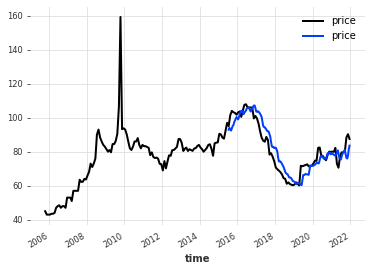

In [11]:
from darts.models import NaiveEnsembleModel

models = [NaiveDrift(), NaiveSeasonal(12)]

ensemble_model = NaiveEnsembleModel(models=models)

backtest = ensemble_model.historical_forecasts(
    series, start=0.6, forecast_horizon=3, verbose=True
)

print("NaiveEnsembleModel = MAE = " , (mae(backtest, series)))
series.plot()
backtest.plot()

Training: 0it [00:00, ?it/s]

  0%|          | 0/155 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

RNNModel = MAE =  5.4463305625080825


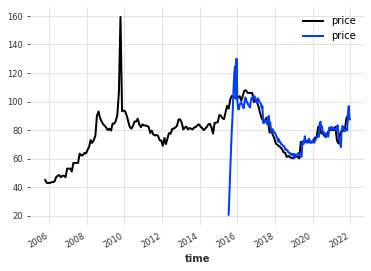

In [12]:
from darts.models import RNNModel

model = RNNModel(input_chunk_length=4)


model.fit(train_scaled)

backtest = model.historical_forecasts(series,start=0.6, forecast_horizon=3,verbose=True)
print("RNNModel = MAE = " , (mae(backtest, series)))
series.plot()
backtest.plot()